## Importando os módulos necessários

In [29]:
%matplotlib inline
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
from skimage.filters import threshold_yen
from skimage.filters import threshold_li
from skimage.measure import label, regionprops
from skimage.color import label2rgb

## Consulta do banco de dados

In [2]:
hs.material.elements.Au.Atomic_properties.Xray_lines

├── Ka
│   ├── energy (keV) = 68.8062
│   └── weight = 1.0
├── Kb
│   ├── energy (keV) = 77.9819
│   └── weight = 0.15
├── La
│   ├── energy (keV) = 9.713
│   └── weight = 1.0
├── Lb1
│   ├── energy (keV) = 11.4425
│   └── weight = 0.40151
├── Lb2
│   ├── energy (keV) = 11.5848
│   └── weight = 0.21949
├── Lb3
│   ├── energy (keV) = 11.6098
│   └── weight = 0.069
├── Lb4
│   ├── energy (keV) = 11.205
│   └── weight = 0.0594
├── Lg1
│   ├── energy (keV) = 13.3816
│   └── weight = 0.08407
├── Lg3
│   ├── energy (keV) = 13.8074
│   └── weight = 0.0194
├── Ll
│   ├── energy (keV) = 8.4938
│   └── weight = 0.0562
├── Ln
│   ├── energy (keV) = 10.3087
│   └── weight = 0.01379
├── M2N4
│   ├── energy (keV) = 2.7958
│   └── weight = 0.02901
├── M3O4
│   ├── energy (keV) = 2.73469
│   └── weight = 0.005
├── M3O5
│   ├── energy (keV) = 2.73621
│   └── weight = 0.01
├── Ma
│   ├── energy (keV) = 2.1229
│   └── weight = 1.0
├── Mb
│   ├── energy (keV) = 2.2047
│   └── weight = 0.59443
├── Mg
│   ├── energy (keV) = 2.4091
│   └── weight = 0.08505
└── Mz
    ├── energy (keV) = 1.6603
    └── weight = 0.01344

In [3]:
hs.material.elements.Ag.Atomic_properties.Xray_lines

├── Ka
│   ├── energy (keV) = 22.1629
│   └── weight = 1.0
├── Kb
│   ├── energy (keV) = 24.9426
│   └── weight = 0.15
├── La
│   ├── energy (keV) = 2.9844
│   └── weight = 1.0
├── Lb1
│   ├── energy (keV) = 3.1509
│   └── weight = 0.35175
├── Lb2
│   ├── energy (keV) = 3.3478
│   └── weight = 0.1165
├── Lb3
│   ├── energy (keV) = 3.2344
│   └── weight = 0.0737
├── Lb4
│   ├── energy (keV) = 3.2034
│   └── weight = 0.0444
├── Lg1
│   ├── energy (keV) = 3.5204
│   └── weight = 0.03735
├── Lg3
│   ├── energy (keV) = 3.7499
│   └── weight = 0.014
├── Ll
│   ├── energy (keV) = 2.6336
│   └── weight = 0.04129
└── Ln
    ├── energy (keV) = 2.8062
    └── weight = 0.0131

In [4]:
hs.material.elements.Si.Atomic_properties.Xray_lines

├── Ka
│   ├── energy (keV) = 1.7397
│   └── weight = 1.0
└── Kb
    ├── energy (keV) = 1.8389
    └── weight = 0.02779

In [5]:
hs.material.elements.Cu.Atomic_properties.Xray_lines

├── Ka
│   ├── energy (keV) = 8.0478
│   └── weight = 1.0
├── Kb
│   ├── energy (keV) = 8.9053
│   └── weight = 0.13157
├── La
│   ├── energy (keV) = 0.9295
│   └── weight = 1.0
├── Lb1
│   ├── energy (keV) = 0.9494
│   └── weight = 0.03197
├── Lb3
│   ├── energy (keV) = 1.0225
│   └── weight = 0.00114
├── Ll
│   ├── energy (keV) = 0.8113
│   └── weight = 0.08401
└── Ln
    ├── energy (keV) = 0.8312
    └── weight = 0.01984

## Definição dos parâmetros do microscópio e dos dados

In [30]:
S = hs.load('HSI_simul6nm27NPTRUE.hdf5', signal_type="EDS_TEM")

In [31]:
S.set_microscope_parameters(beam_energy=200)
S.set_microscope_parameters(azimuth_angle=17.4)

In [32]:
S.metadata.Acquisition_instrument.TEM

├── Detector
│   └── EDS
│       ├── azimuth_angle = 17.4
│       ├── elevation_angle = 35.0
│       └── energy_resolution_MnKa = 130.0
├── Stage
│   └── tilt_alpha = 0.0
└── beam_energy  = 200

In [33]:
S.axes_manager.navigation_axes[0].name = "X"
S.axes_manager.navigation_axes[1].name = "Y"
S.axes_manager.signal_axes[0].name = "Energy"

S.axes_manager["X"].scale = 0.5
S.axes_manager["Y"].scale = 0.5
S.axes_manager["X"].units = "nm"
S.axes_manager["Y"].units = "nm"
S.axes_manager["Energy"].scale = 0.02
S.axes_manager["Energy"].units = "keV"
S.axes_manager["Energy"].offset = -0.22

### Definição de todas as linhas presentes

In [11]:
S.set_elements(['Ag', 'Au', 'C', 'Cu'])
S.set_lines(['Ag_La', 'Ag_Lb1', 'Ag_Lb2', 'Au_La', 'Au_Ma', 'Au_Mb', 'Cu_Ka', 'Cu_La', 'Cu_Kb', 'C_Ka'])

S.metadata.Sample

├── elements = ['Ag', 'Au', 'C', 'Cu']
└── xray_lines = ['Ag_La', 'Ag_Lb1', 'Ag_Lb2', 'Au_La', 'Au_Ma', 'Au_Mb', 'C_Ka', 'Cu_Ka', 'Cu_Kb', 'Cu_La']

### Definição somente das linhas que representam Ag e Au

In [34]:
S.set_elements(['Ag', 'Au'])
S.set_lines(['Ag_La', 'Au_La'])

S.metadata.Sample

├── elements = ['Ag', 'Au']
└── xray_lines = ['Ag_La', 'Au_La']

## Decomposição em PCA

In [35]:
S.change_dtype('float')

S.decomposition(normalize_poissonian_noise=True)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


<Axes: title={'center': '\nPCA Scree Plot'}, xlabel='Principal component number', ylabel='Proportion of variance'>

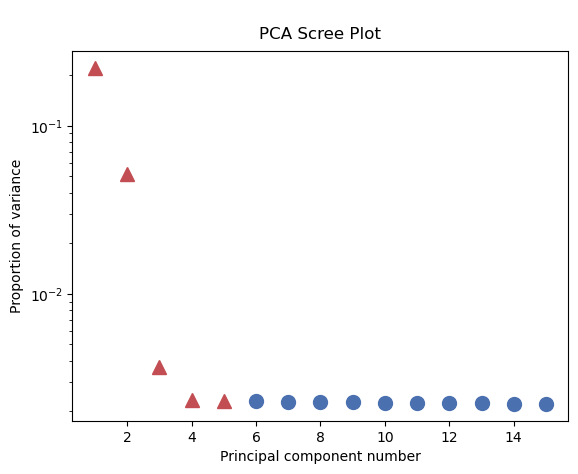

In [36]:
S.plot_explained_variance_ratio(n=15, threshold=5, xaxis_type='number')

In [37]:
S.decomposition(normalize_poissonian_noise=True, output_dimension=5)
SC = S.get_decomposition_model(5)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=5
  centre=None


In [38]:
factors = SC.get_decomposition_factors()
loadings = SC.get_decomposition_loadings()

<Axes: xlabel='Energy (keV)'>

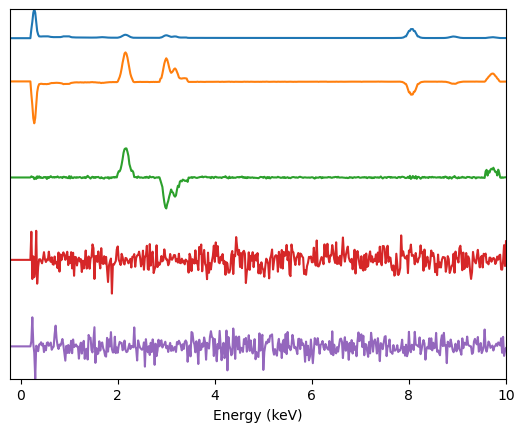

In [42]:
for f in factors:
    f.data /= f.data.max()

hs.plot.plot_spectra(factors.isig[:512], style='cascade', padding=-1.2)
# hs.plot.plot_images(loadings, cmap='mpl_colors',
#             axes_decor='off', per_row=1,
#             label=['Background', 'Composição média', 'Mudança na composição', 'Ruído', 'Ruído'],
#             scalebar=[0], scalebar_color='white',
#             padding={'top': 0.95, 'bottom': 0.05,
#                      'left': 0.05, 'right':0.78})

In [43]:
loading_data0 = loadings.data[0]
loading_data1 = loadings.data[1]
loading_data2 = loadings.data[2]
loading_data3 = loadings.data[3]
loading_data4 = loadings.data[4]

In [44]:
factor_data0 = factors.data[0]
factor_data1 = factors.data[1]
factor_data2 = factors.data[2]
factor_data3 = factors.data[3]
factor_data4 = factors.data[4]

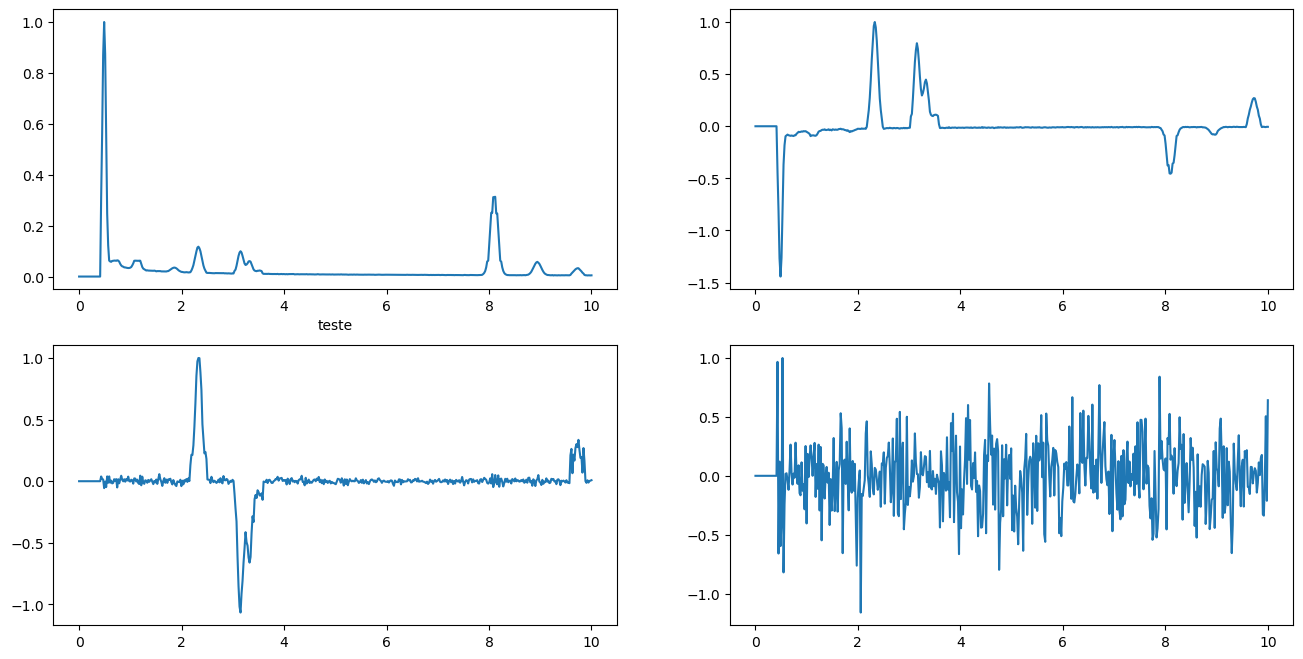

In [45]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

ax = axis.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3)
ax[3] = plt.subplot(2, 2, 4)

x = np.linspace(0, 10, 512)

ax[0].plot(x, factor_data0)
ax[0].set_xlabel('teste')
ax[1].plot(x, factor_data1)
ax[2].plot(x, factor_data2)
ax[3].plot(x, factor_data3)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

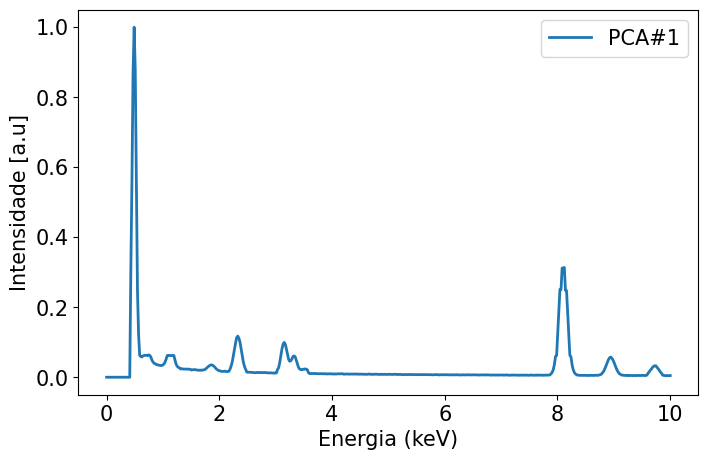

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 10, 512)

ax.plot(x, factor_data0, linewidth=2, label='PCA#1')
ax.set_xlabel('Energia (keV)', fontsize='15')
ax.set_ylabel('Intensidade [a.u]', fontsize='15')
ax.legend(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(fontsize='15')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

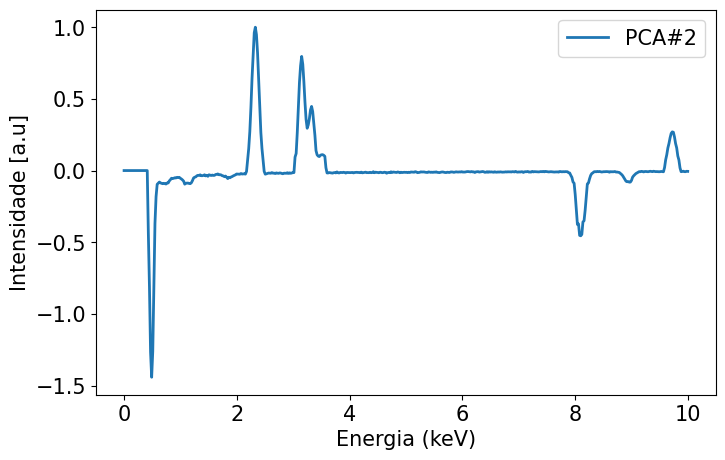

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 10, 512)

ax.plot(x, factor_data1, linewidth=2, label='PCA#2')
ax.set_xlabel('Energia (keV)', fontsize='15')
ax.set_ylabel('Intensidade [a.u]', fontsize='15')
ax.legend(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(fontsize='15')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 10, 512)

ax.plot(x, factor_data2, linewidth=2, label='PCA#3')
ax.set_xlabel('Energia (keV)', fontsize='15')
ax.set_ylabel('Intensidade [a.u]', fontsize='15')
ax.legend(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(fontsize='15')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 10, 512)

ax.plot(x, factor_data3, linewidth=2, label='PCA#4')
ax.set_xlabel('Energia (keV)', fontsize='15')
ax.set_ylabel('Intensidade [a.u]', fontsize='15')
ax.legend(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(fontsize='15')
ax.set_ylim(ymin=-40, ymax=40)

In [ ]:
S.plot()

In [ ]:
SC.plot(True)

## Definição da janela de integração e de background|

In [49]:
iw_Ag_La = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Ag_La'])
iw_Ag_Lb2 = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Ag_Lb1'])
iw_Ag_L = np.array([iw_Ag_La[0][0], iw_Ag_Lb2[0][1]])

iw_Au_La = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Au_La'])

iw = [[iw_Ag_L[0], iw_Ag_L[1]], iw_Au_La[0]]
iw

[[2.925568630816545, 3.210991430337445],
 [9.615445553663607, 9.810554446336392]]

In [ ]:
iw_Ag_La = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Ag_La'])
iw_Ag_Lb2 = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Ag_Lb1'])
iw_Ag_L = np.array([iw_Ag_La[0][0], iw_Ag_Lb2[0][1]])

iw_Au_Ma = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Au_Ma'])
iw_Au_Mb = SC.estimate_integration_windows(windows_width=1.2, xray_lines=['Au_Mb'])
iw_Au_M = np.array([iw_Au_Ma[0][0], iw_Au_Mb[0][1]])

iw = [[iw_Ag_L[0], iw_Ag_L[1]], [iw_Au_M[0], iw_Au_M[1]]]
iw

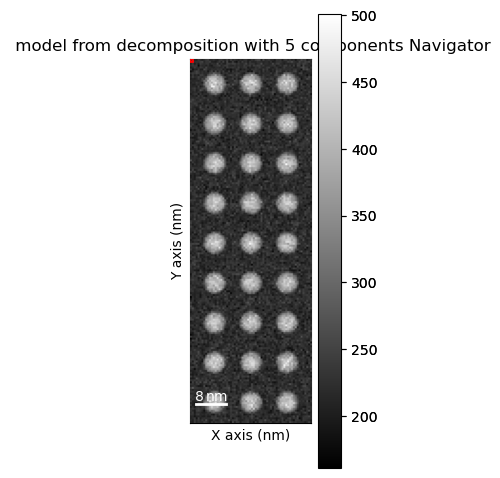

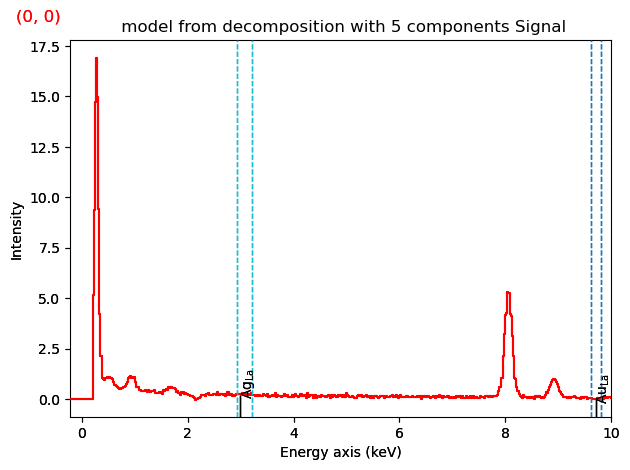

In [50]:
SC.plot(integration_windows=iw)

In [51]:
bw_Ag_L = SC.estimate_background_windows(line_width=[2, 5], xray_lines=['Ag_La'])
bw_Au_La = SC.estimate_background_windows(line_width=[1.1, 1.1], windows_width=0.5, xray_lines=['Au_La'])

bw = np.array([bw_Ag_L[0],bw_Au_La[0]])
bw

array([[2.69024315, 2.78829544, 3.47466141, 3.57271369],
       [9.45285481, 9.53415018, 9.89184982, 9.97314519]])

In [ ]:
bw_Ag_L = SC.estimate_background_windows(line_width=[2, 5], xray_lines=['Ag_La'])
bw_Au_La = SC.estimate_background_windows(line_width=[2, 2.8], windows_width=0.5, xray_lines=['Au_Ma'])

bw = np.array([bw_Ag_L[0],bw_Au_La[0]])
bw

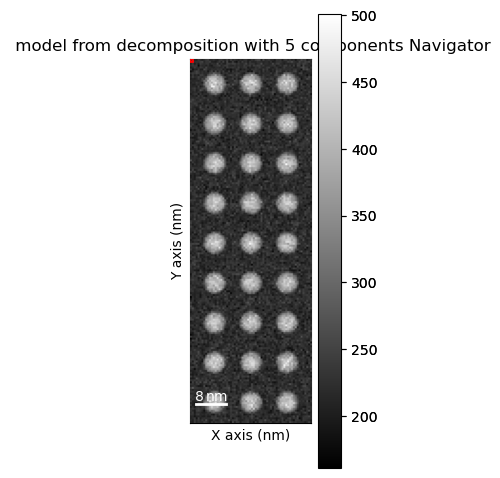

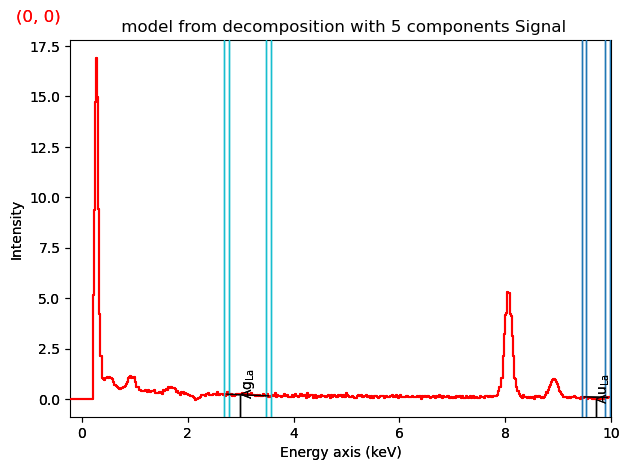

In [52]:
SC.plot(background_windows=bw)

## Mapeamento de cada elemento

In [53]:
eds_maps_pca = SC.get_lines_intensity(xray_lines=['Ag_La', 'Au_La'], integration_windows=iw, background_windows=bw)

In [54]:
eds_maps_raw = S.get_lines_intensity(xray_lines=['Ag_La', 'Au_La'], integration_windows=iw, background_windows=bw)

[<Axes: >]

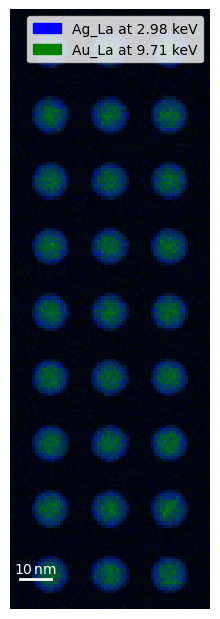

In [55]:
hs.plot.plot_images(eds_maps_pca, axes_decor='off', scalebar='all', overlay=True, label=['Ag_La at 2.98 keV', 'Au_La at 9.71 keV'])

[<Axes: >]

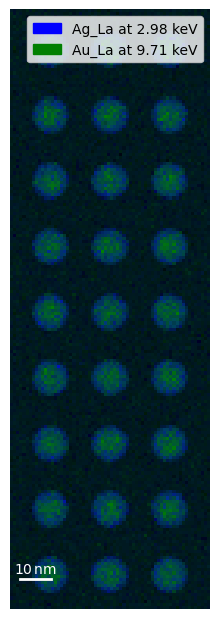

In [56]:
hs.plot.plot_images(eds_maps_raw, axes_decor='off', scalebar='all', overlay=True, label=['Ag_La at 2.98 keV', 'Au_La at 9.71 keV'])

## Segmentação

In [57]:
def threshold(eds_np: "ndarray") -> float:
    thresh1 = threshold_yen(eds_np)
    thresh2 = threshold_li(eds_np)
    
    return (thresh1 + thresh2)/2

In [58]:
def plot_binary(binary, eds_np: "ndarray", threshold: float, pca=False) -> None:
    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(eds_np, cmap=plt.cm.gray)
    if pca:
        ax[0].set_title('Original (PCA)', fontsize='15')
    else:
        ax[0].set_title('Original (RAW)', fontsize='15')
    ax[0].axis('off')
    
    ax[1].hist(eds_np.ravel(), bins=256)
    ax[1].set_title('Histogram', fontsize='15')
    ax[1].axvline(threshold, color='r')
    ax[1].set_xlabel('Intensidade do pixel', fontsize='15')
    ax[1].set_ylabel('Quantidade de pixels', fontsize='15')
    plt.yticks(fontsize='15')
    plt.xticks(fontsize='15')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded', fontsize='15')
    ax[2].axis('off')

    plt.show()

In [59]:
def label_image(binary, plot: bool) -> "ndarray":
    label_image = label(binary)
    
    if plot:
        fig, ax = plt.subplots()
        ax.imshow(label_image, cmap='nipy_spectral')
        
    return label_image

In [60]:
def np_intensities(elem_map: "ndarray", label_image: "ndarray") -> list:
    elem_nps_intensities = []
    
    for region in regionprops(label_image):
        if region.area > 50:
            coords = region.coords
            elem_total_intensity = 0

            for coord in coords:
                elem_total_intensity += elem_map[coord[0]][coord[1]]

            elem_nps_intensities.append(elem_total_intensity)

    return elem_nps_intensities

In [61]:
def cliff_lorimer(elem_1_intensities: list, elem_2_intensities: list, kfactors: list[float, float]) -> list[list, list]:
    I_elem_1 = np.array(elem_1_intensities)
    I_elem_2 = np.array(elem_2_intensities)
    
    k = kfactors[0]/kfactors[1]

    div = (kfactors[0]*I_elem_1)/(kfactors[1]*I_elem_2)  # div = C_elem1 / C_elem2
    C_elem_2 = 1/(1 + div)
    C_elem_1 = 1 - C_elem_2
    
#     kfactor_list = I_elem_2*kfactors[1]/I_elem_1
#     kfactor = sum(kfactor_list)/len(kfactor_list)
#     print(kfactor)

    I_elem_1_std = np.sqrt(I_elem_1)
    I_elem_2_std = np.sqrt(I_elem_2)
    k_std = 0.02*kfactors[0]/kfactors[1]
    
    div_std = np.sqrt((I_elem_1*k_std/I_elem_2)**2 + (k*I_elem_1_std/I_elem_2)**2 + (k*I_elem_1*I_elem_2_std/I_elem_2**2)**2)
    
    C_elem_std = div_std/(1 + div)**2
    
    
    
    return [C_elem_1, C_elem_2, C_elem_std]

In [62]:
def avg_area_label_regions(label_image: "ndarray"):
    avg_area = 0
    for region in regionprops(label_image):
        avg_area += region.area
        
    return (avg_area/len(regionprops(label_image)))
        

## dados com PCA

In [63]:
eds_np_pca = eds_maps_pca[0] + eds_maps_pca[1]

In [65]:
thresh_pca = threshold(eds_np_pca.data)

In [66]:
binary_pca = eds_np_pca.data > thresh_pca

C:\Users\geanr\AppData\Local\Temp\ipykernel_5860\2461717185.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


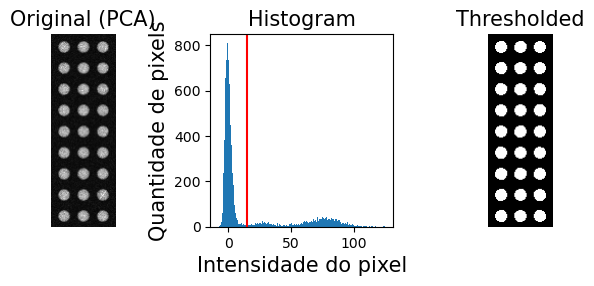

In [67]:
plot_binary(binary_pca, eds_np_pca.data, thresh_pca, pca=True)

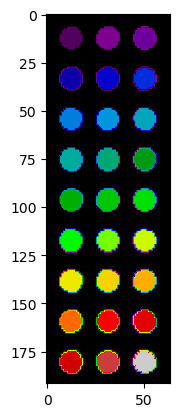

In [68]:
label_image_pca = label_image(binary_pca, plot=True)

In [69]:
avg_radius = np.sqrt(avg_area_label_regions(label_image_pca)/np.pi)
avg_radius

6.0141029650741515

In [70]:
Ag_nps_intensity_pca = np_intensities(eds_maps_pca[0].data, label_image_pca)
Au_nps_intensity_pca = np_intensities(eds_maps_pca[1].data, label_image_pca)

In [71]:
kfactors = [1, 3.84]  # kfactors para Ag_La_Fe e Au_La_Fe

In [72]:
C_pca = cliff_lorimer(Ag_nps_intensity_pca, Au_nps_intensity_pca, kfactors)

In [73]:
C_Ag_pca = C_pca[0]
C_Au_pca = C_pca[1]

In [74]:
np.std(C_Au_pca)

0.00760765858055819

In [75]:
avg_Au_pca = sum(C_Au_pca)/len(C_Au_pca)
avg_Au_pca

0.49787971579328527

In [76]:
def scatter_hist(x, y, ax, ax_histy):
    ax_histy.tick_params(axis="y", labelleft=False)
        
    ax.scatter(x, y)
    ax_histy.hist(y, orientation='horizontal')

## dados brutos

In [79]:
eds_np_raw = eds_maps_raw[0] + eds_maps_raw[1]

In [81]:
thresh_raw = threshold(eds_np_raw.data)

In [82]:
binary_raw = eds_np_raw.data > thresh_raw

C:\Users\geanr\AppData\Local\Temp\ipykernel_5860\2461717185.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


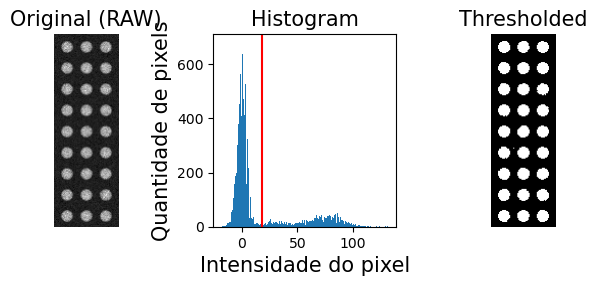

In [83]:
plot_binary(binary_raw, eds_np_raw.data, thresh_raw)

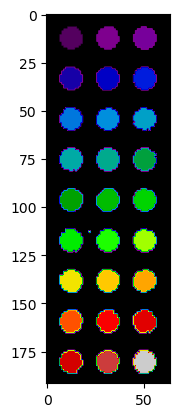

In [84]:
label_image_raw = label_image(binary_raw, plot=True)

In [85]:
Ag_nps_intensity_raw = np_intensities(eds_maps_raw[0].data, label_image_raw)
Au_nps_intensity_raw = np_intensities(eds_maps_raw[1].data, label_image_raw)

In [86]:
C_raw = cliff_lorimer(Ag_nps_intensity_raw, Au_nps_intensity_raw, kfactors)

In [87]:
C_Ag_raw = C_raw[0]
C_Au_raw = C_raw[1]

In [88]:
np.std(C_Au_raw)

0.009479550441758123

In [89]:
avg_Au_raw = sum(C_Au_raw)/len(C_Au_raw)
avg_Au_raw

0.4972453318562224

In [90]:
C_raw[2]

array([0.00869677, 0.00871698, 0.00882179, 0.00876196, 0.00870426,
       0.00873173, 0.00883134, 0.00877288, 0.00866913, 0.00880802,
       0.00875064, 0.008621  , 0.00868006, 0.00882234, 0.0086935 ,
       0.00878415, 0.00867681, 0.00876468, 0.00885827, 0.00871415,
       0.00867433, 0.0087493 , 0.00878194, 0.00873463, 0.00877184,
       0.00880922, 0.00876715])

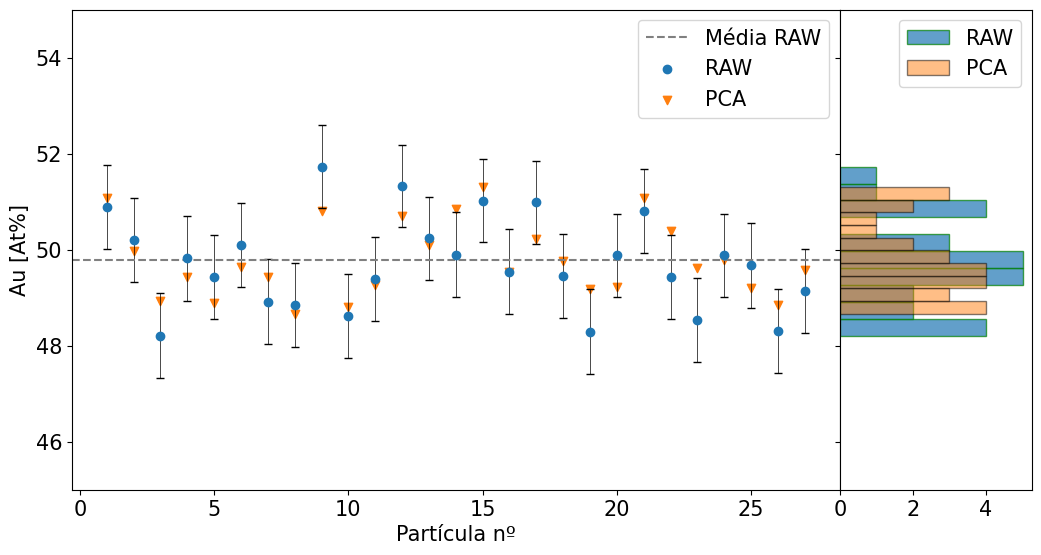

In [91]:
fig = plt.figure(figsize=(12,6))

x = np.linspace(1, 27, 27)
y_raw = C_Au_raw*100
y_raw_err = C_raw[2]*100
y_pca = C_Au_pca*100

gs = fig.add_gridspec(1, 2, width_ratios=(4, 1), left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.0)

ax = fig.add_subplot(gs[0,0])
ax_histy = fig.add_subplot(gs[0,1], sharey=ax)

ax.set(ylim=(45, 55))
ax.axhline(avg_Au_pca*100, 0, 27, ls='--', c='grey', label="Média RAW")

ax_histy.tick_params(axis="y", labelleft=False)

ax.scatter(x, y_raw, label='RAW', zorder=2)
ax.scatter(x, y_pca, marker='v', label='PCA')
ax_histy.hist(y_raw, orientation='horizontal', label='RAW', alpha=.7, edgecolor='green')
ax_histy.hist(y_pca, orientation='horizontal', label='PCA', alpha=.5, edgecolor='black')

ax.errorbar(x, y_raw, yerr=y_raw_err, fmt='None', ecolor='black', elinewidth=0.5, capsize=3, barsabove=False, zorder=1)

ax.legend(fontsize='15')
ax.tick_params(labelsize='15')
ax_histy.legend(fontsize='15')
ax_histy.tick_params(labelsize='15')

plt.yticks(fontsize='15')

ax.set_xlabel('Partícula nº', fontsize='15')
ax.set_ylabel('Au [At%]', fontsize='15')

plt.show()